In [44]:
import xarray as xr
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from itertools import product

def get_season(months):
    if months == [12,1,2]:
        return "DJF"
    elif months == [3,4,5]:
        return "MAM"
    elif months == [6,7,8]:
        return "JJA"
    elif months == [9,10,11]:
        return "SON"
    else:
        return ""


In [2]:
#Data created using era5_spatial_cluster.py
f = xr.open_mfdataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/clusters*", concat_dim="time", combine="nested")
times = pd.to_datetime(f.time.values)

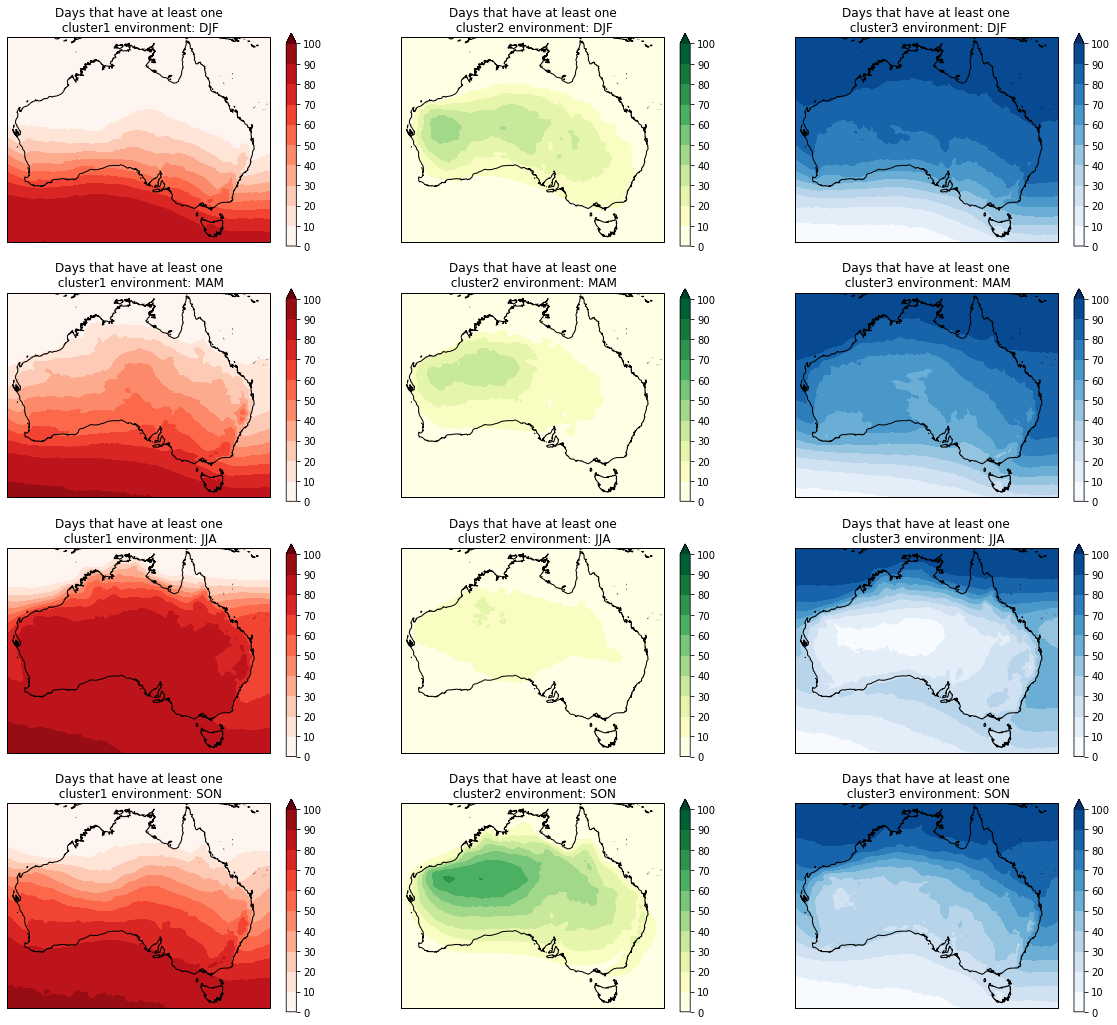

In [3]:
def plot_clim_cluster(da,times,months,ax):

    #levs = [0,1,5,10,15,20,30,40,60,90]
    levs = np.linspace(0,100,11)

    cmaps = {"cluster1":plt.get_cmap("Reds"), "cluster2":plt.get_cmap("YlGn"), "cluster3":plt.get_cmap("Blues")}

    
    c=xr.plot.contourf((da.sel({"time":np.in1d([t.month for t in times],months)}).sum("time") / (2021-1979)), 
                       cmap=cmaps[da.name],levels=levs, ax=ax, extend="max",add_colorbar=False)
    ax.coastlines("10m")
    cb=plt.colorbar(c)
    cb.set_ticks(levs)
    plt.title("Days that have at least one\n " + da.name + " environment: " + get_season(months))
    

plt.figure(figsize=[20,18])
iters = product(([12,1,2],[3,4,5],[6,7,8],[9,10,11]), (f.cluster1, f.cluster2, f.cluster3))
cnt=1
for season, da in iters:
    plot_clim_cluster(da, times, season, plt.subplot(4,3,cnt,projection=ccrs.PlateCarree()))
    cnt=cnt+1

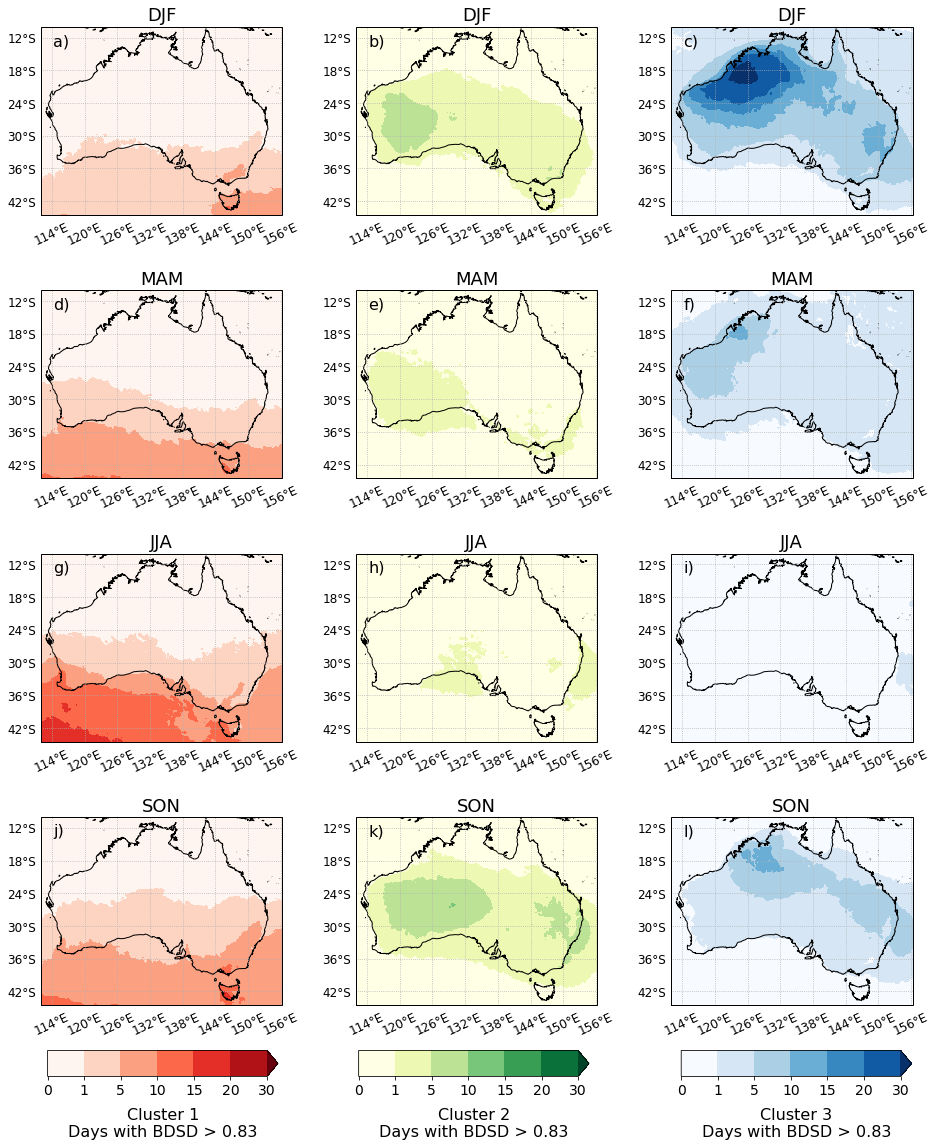

In [60]:
def plot_bdsd_cluster(da,times,months,ax,letter):

    #levs = [0,1,5,10,15,20,30,40,60,90]
    levs = [0,1,5,10,15,20,30]
    title={"cluster1_bdsd":"Cluster 1","cluster2_bdsd":"Cluster 2","cluster3_bdsd":"Cluster 3"}

    cmaps = {"cluster1_bdsd":plt.get_cmap("Reds"), "cluster2_bdsd":plt.get_cmap("YlGn"), "cluster3_bdsd":plt.get_cmap("Blues")}

    
    c=xr.plot.contourf((da.sel({"time":np.in1d([t.month for t in times],months)}).sum("time") / (2021-1979)), 
                       cmap=cmaps[da.name],levels=levs, ax=ax, extend="max",add_colorbar=False)
    plt.title(get_season(months),size=18)
    
    if get_season(months)=="SON":
        if da.name=="cluster1_bdsd":
            cax=plt.axes([0.14,0.07,0.2,0.02])
        elif da.name=="cluster2_bdsd":
            cax=plt.axes([0.41,0.07,0.2,0.02])
        elif da.name=="cluster3_bdsd":
            cax=plt.axes([0.69,0.07,0.2,0.02])
        cb=plt.colorbar(c,cax=cax,orientation="horizontal")
        cb.set_ticks(levs)
        cb.ax.tick_params(labelsize=14)
        cb.set_label(title[da.name]+"\nDays with BDSD > 0.83",size=16,labelpad=10)
    
    ax.coastlines("10m")
    g=ax.gridlines(draw_labels=True,linestyle=":"); g.xlabels_top=False; g.ylabels_right=False
    g.xlabel_style={"size":12,'rotation':25}
    g.ylabel_style={"size":12}
    g.xformatter = LONGITUDE_FORMATTER
    g.yformatter = LATITUDE_FORMATTER    
    
    ax.text(0.05,0.9,letter+")",size=16,transform=ax.transAxes)

plt.figure(figsize=[16,18])
iters = product(([12,1,2],[3,4,5],[6,7,8],[9,10,11]), (f.cluster1_bdsd, f.cluster2_bdsd, f.cluster3_bdsd))
cnt=1
letters=["a","b","c","d","e","f","g","h","i","j","k","l"]
for season, da in iters:
    plot_bdsd_cluster(da, times, season, plt.subplot(4,3,cnt,projection=ccrs.PlateCarree()),letters[cnt-1])
    cnt=cnt+1
    
plt.subplots_adjust(hspace=0.4)
    
plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/era5_spatial_cluster_bdsd.jpeg",bbox_inches="tight",dpi=500)

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered

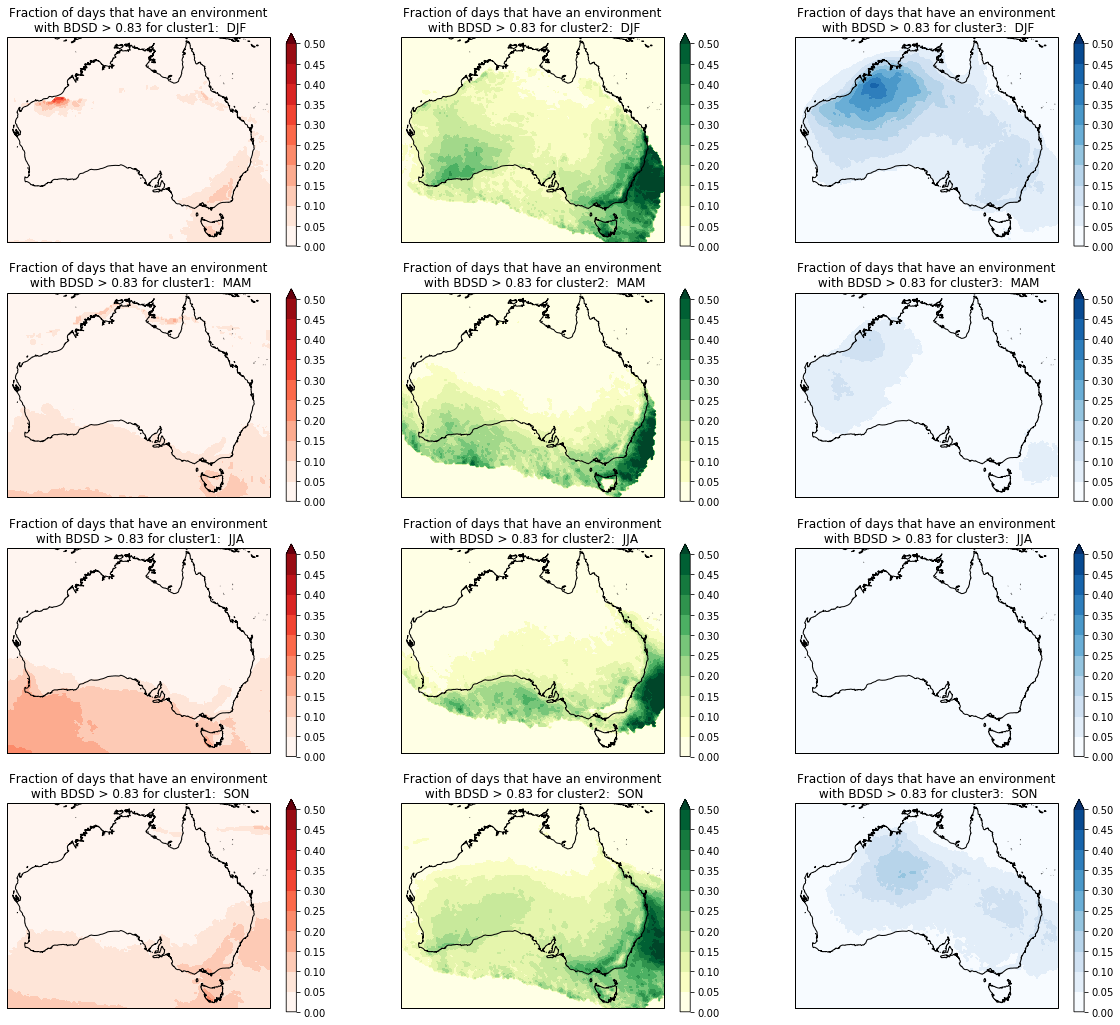

In [36]:
def plot_bdsd_fraction(da_cluster,da_bdsd,times,months,ax):

    levs = np.linspace(0,0.5,11)

    cmaps = {"cluster1":plt.get_cmap("Reds"), "cluster2":plt.get_cmap("YlGn"), "cluster3":plt.get_cmap("Blues")}

    frac = (da_bdsd.sel({"time":np.in1d([t.month for t in times],months)}).sum("time")) / \
                       (da_cluster.sel({"time":np.in1d([t.month for t in times],months)}).sum("time"))
    c=xr.plot.contourf(xr.where(
        (da_cluster.sel({"time":np.in1d([t.month for t in times],months)}).sum("time") / (2021-1979)) >= 1,
        frac, 0),
                       cmap=cmaps[da_cluster.name],levels=levs, ax=ax, extend="max",add_colorbar=False)
    ax.coastlines("10m")
    cb=plt.colorbar(c)
    cb.set_ticks(levs)
    plt.title("Fraction of days that have an environment\n with BDSD > 0.83 for " + da_cluster.name + ":  "+ get_season(months))
    

plt.figure(figsize=[20,18])
iters = product(([12,1,2],[3,4,5],[6,7,8],[9,10,11]), zip((f.cluster1, f.cluster2, f.cluster3),(f.cluster1_bdsd, f.cluster2_bdsd, f.cluster3_bdsd)))
cnt=1
for season, da in iters:
    plot_bdsd_fraction(da[0], da[1], times, season, plt.subplot(4,3,cnt,projection=ccrs.PlateCarree()))
    cnt=cnt+1

Text(0.5, 1.0, 'Fraction of times that belong to cluster 3\n and have BDSD > 0.83')

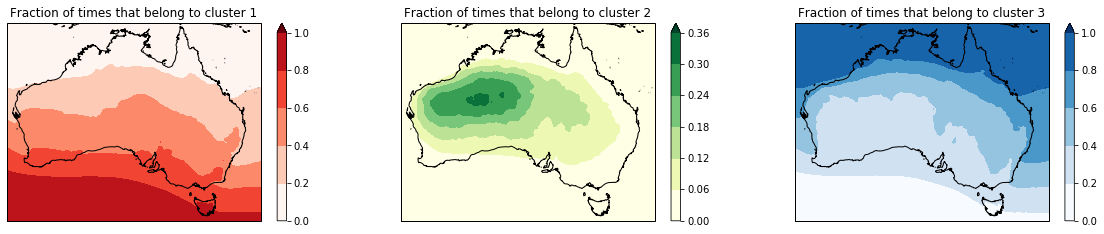

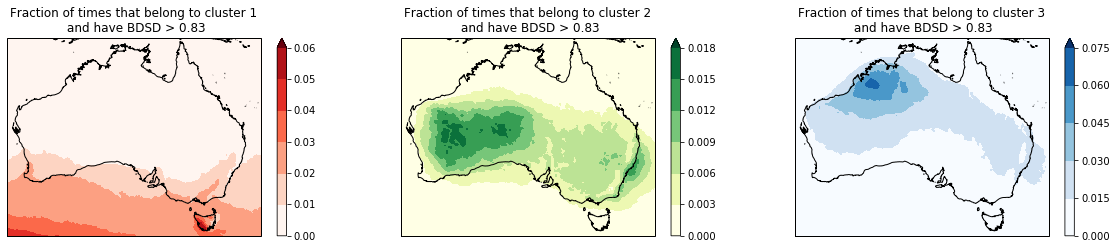

In [4]:
#levs=[0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
levs=None

plt.figure(figsize=[20,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster1.mean("time"), cmap=plt.get_cmap("Reds"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 1")

ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster2.mean("time"), cmap=plt.get_cmap("YlGn"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 2")

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster3.mean("time"), cmap=plt.get_cmap("Blues"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 3")




#levs=[0,0.001,0.01,0.02,0.03,0.04,0.05]
levs=None

plt.figure(figsize=[20,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster1_bdsd.mean("time"), cmap=plt.get_cmap("Reds"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 1\n and have BDSD > 0.83")

ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster2_bdsd.mean("time"), cmap=plt.get_cmap("YlGn"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 2\n and have BDSD > 0.83")

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster3_bdsd.mean("time"), cmap=plt.get_cmap("Blues"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 3\n and have BDSD > 0.83")

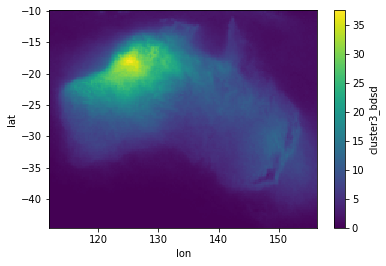

In [17]:
(f.isel({"time":np.in1d(f["time.month"],[12,1,2])}).cluster3_bdsd.sum("time") / (2021-1979)).plot()